# Import Data and Required Packages

    Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

<b>Import the CSV Data as Pandas DataFrame with help of Pandas library<b>

In [2]:
df=pd.read_excel(r'C:\Users\wwwko\Downloads\Online Retail.xlsx')

# Check the data insight with automated tool

In [3]:
from pandas_profiling import ProfileReport
Profile=ProfileReport(df)
Profile.to_file(output_file='output.html')


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<b>Attributes and initial 5 records of data<b>

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


<b> Last 5 records of data<b>

In [5]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


<b>Shape of the dataset<b>

In [6]:
df.shape

(541909, 8)

<b>Data Summary<b>

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


<b>Data types of the features<b>

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


# <b>Exploring the Data<b>

<b>Features and Total number of features at initial<b>

In [9]:
print('Total number of columns',len(df.columns),'\n \n', df.columns)

Total number of columns 8 
 
 Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


<b> Find the numerical and categorical columns<b>

In [10]:
Categorical_columns=[features for features in df.columns if df[features].dtypes=='O']
print('We have total', len(Categorical_columns), 'Categorical features and the features are\n \n', Categorical_columns,'\n \n')
Neumerical_columns=[features for features in df.columns if df[features].dtypes!='O']
print('We have total', len(Neumerical_columns), 'Neumerical features and the features are\n \n', Neumerical_columns)

We have total 4 Categorical features and the features are
 
 ['InvoiceNo', 'StockCode', 'Description', 'Country'] 
 

We have total 4 Neumerical features and the features are
 
 ['Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID']


# Adding New Features to our Dataset

- <b>Adding Sales column
    
- <b>Adding Day, Month and Year column with the help of InvoiceDate Column

In [11]:
def add_features(df):
    df['Sales']= df['Quantity']*df['UnitPrice']
    df['Day']=df['InvoiceDate'].dt.day
    df['Month']=df['InvoiceDate'].dt.month
    df['Year']=df['InvoiceDate'].dt.year
    return df
df=add_features(df)

In [12]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Day,Month,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,1,12,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,1,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1,12,2010


# Exploring Data

- <b> Quantity purchased by every individual customer

In [13]:
df.groupby('CustomerID')['Quantity'].mean().sort_values(ascending=False)

CustomerID
13256.0    12540.00
13135.0     4300.00
16754.0     2140.00
16308.0     2000.00
14609.0     1756.50
             ...   
15638.0      -26.00
12666.0      -28.00
16742.0      -47.25
14213.0      -48.80
17307.0     -144.00
Name: Quantity, Length: 4372, dtype: float64

- <b> Country wise procucts quantity sold

In [14]:
df.groupby('Country')['Quantity'].sum().sort_values(ascending=False).reset_index()

,Country,Quantity
0,United Kingdom,4263829
1,Netherlands,200128
2,EIRE,142637
3,Germany,117448
4,France,110480
5,Australia,83653
6,Sweden,35637
7,Switzerland,30325
8,Spain,26824
9,Japan,25218


- <b>Month and Year wise total Sales

In [15]:
sales_Year_and_Month_wise=df.groupby(['Month','Year'])['Sales'].sum().sort_values(ascending=False).rename('Total sale of the month').reset_index()
sales_Year_and_Month_wise

,Month,Year,Total sale of the month
0,11,2011,1461756.250
1,10,2011,1070704.670
2,9,2011,1019687.622
3,12,2010,748957.020
4,5,2011,723333.510
5,6,2011,691123.120
6,3,2011,683267.080
7,8,2011,682680.510
8,7,2011,681300.111
9,1,2011,560000.260


<AxesSubplot:title={'center':'Month Wise Sales'}, xlabel='Month', ylabel='Sales (M)'>

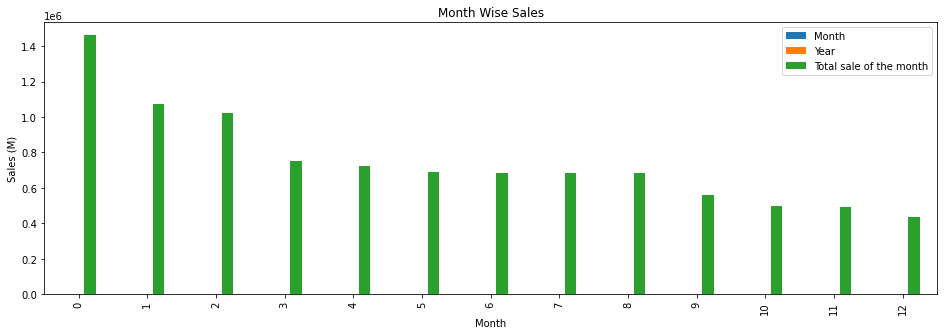

In [16]:
sales_Year_and_Month_wise.plot(kind='bar', title='Month Wise Sales', ylabel='Sales (M)',
         xlabel='Month', figsize=(16, 5),fontsize=10)

- <b>Total number of unique Customer

In [17]:
len(df['CustomerID'].unique())

4373

In [18]:
Max_purchase_by_a_customer=df.groupby(['CustomerID'])['Sales'].sum().sort_values(ascending=False).rename('Max purchased by a customer').reset_index()
Max_purchase_by_a_customer

,CustomerID,Max purchased by a customer
0,14646.0,279489.02
1,18102.0,256438.49
2,17450.0,187482.17
3,14911.0,132572.62
4,12415.0,123725.45
...,...,...
4367,12503.0,-1126.00
4368,17603.0,-1165.30
4369,14213.0,-1192.20
4370,15369.0,-1592.49


- <b> Most Sale vs Countery and Individual customer

In [19]:
Max_purchase_by_a_customer_by_country=df.groupby(['CustomerID', 'Country'])['Sales'].sum().sort_values(ascending=False).rename('Max purchased by a customer').reset_index()
Max_purchase_by_a_customer_by_country

,CustomerID,Country,Max purchased by a customer
0,14646.0,Netherlands,279489.02
1,18102.0,United Kingdom,256438.49
2,17450.0,United Kingdom,187482.17
3,14911.0,EIRE,132572.62
4,12415.0,Australia,123725.45
...,...,...,...
4375,12503.0,Spain,-1126.00
4376,17603.0,United Kingdom,-1165.30
4377,14213.0,United Kingdom,-1192.20
4378,15369.0,United Kingdom,-1592.49


# Univariate Analysis

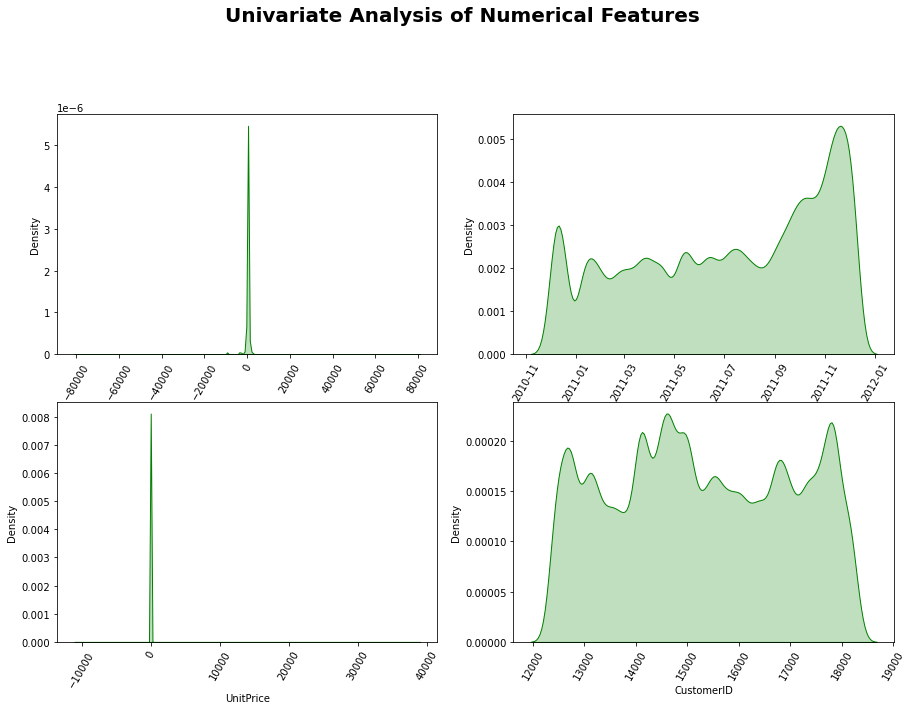

In [20]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold')
for i in range(len(Neumerical_columns)):
    plt.subplot(3, 2, i+1)
    sns.kdeplot(x=df[Neumerical_columns[i]],shade=True, color='g')
    plt.xlabel(Neumerical_columns[i])
    plt.xticks(rotation=60)

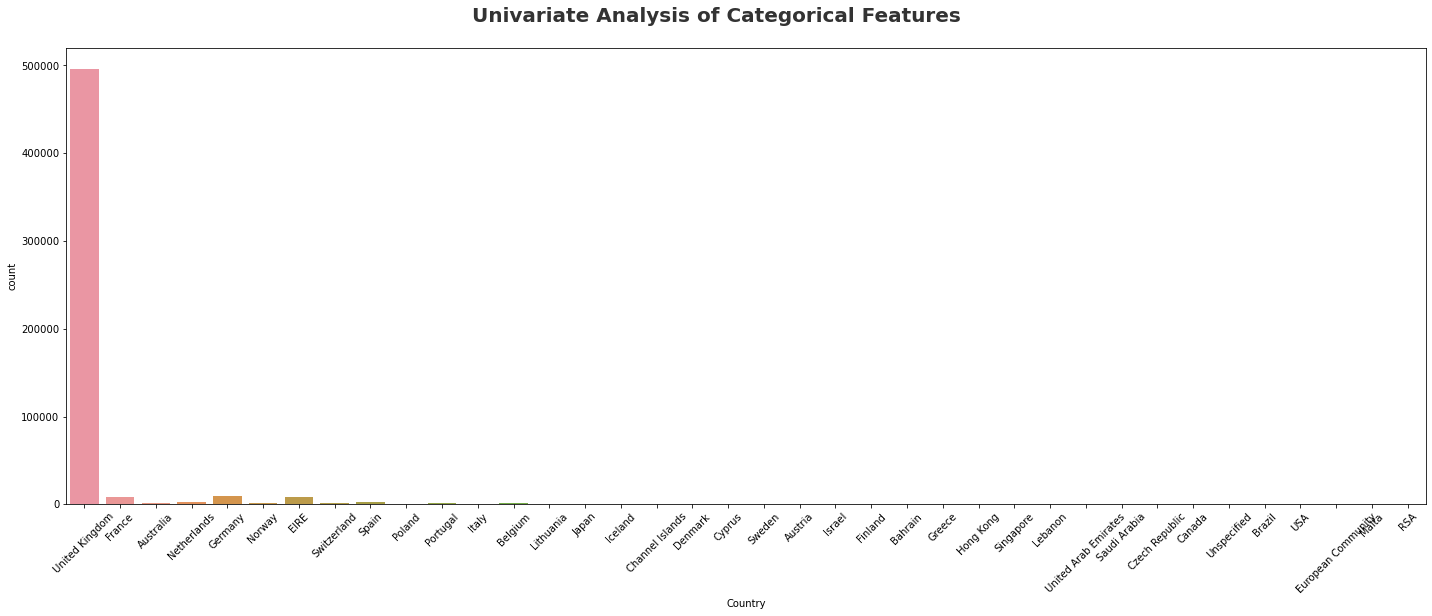

In [21]:
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
cat1 = ['Country']
for i in range(0, len(cat1)):
    plt.subplot(2, 1, i+1)
    sns.countplot(x=df[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

<b> Find the co-Relation between Features

In [22]:
df.corr()

,Quantity,UnitPrice,CustomerID,Sales,Day,Month,Year
Quantity,1.000000,-0.001235,-0.003600,0.886681,-0.000010,-0.001116,0.002001
UnitPrice,-0.001235,1.000000,-0.004560,-0.162029,-0.002667,-0.000497,-0.004586
CustomerID,-0.003600,-0.004560,1.000000,-0.002274,-0.001770,0.030612,-0.035955
Sales,0.886681,-0.162029,-0.002274,1.000000,-0.000259,0.000141,0.000275
Day,-0.000010,-0.002667,-0.001770,-0.000259,1.000000,-0.118878,0.163774
Month,-0.001116,-0.000497,0.030612,0.000141,-0.118878,1.000000,-0.369595
Year,0.002001,-0.004586,-0.035955,0.000275,0.163774,-0.369595,1.000000


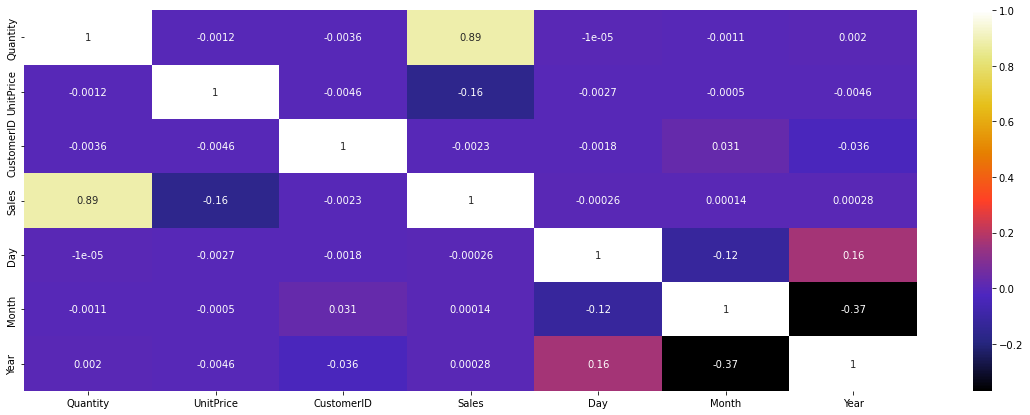

In [23]:
plt.figure(figsize = (20,7))
sns.heatmap(df.corr(),cmap="CMRmap",annot=True)
plt.show()

<b> Find the covariance between Features

In [24]:
df.cov()

,Quantity,UnitPrice,CustomerID,Sales,Day,Month,Year
Quantity,47559.391409,-26.058761,-1.534050e+03,73250.057621,-0.019520,-0.853999,0.117291
UnitPrice,-26.058761,9362.469164,-5.415793e+02,-5938.944146,-2.236071,-0.168862,-0.119275
CustomerID,-1534.050176,-541.579276,2.936426e+06,-1666.298038,-26.253525,179.347414,-15.297020
Sales,73250.057621,-5938.944146,-1.666298e+03,143497.640005,-0.851040,0.187806,0.028017
Day,-0.019520,-2.236071,-2.625352e+01,-0.851040,75.065983,-3.614202,0.381395
Month,-0.853999,-0.168862,1.793474e+02,0.187806,-3.614202,12.313470,-0.348597
Year,0.117291,-0.119275,-1.529702e+01,0.028017,0.381395,-0.348597,0.072246


In [25]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Day,Month,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,1,12,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,1,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1,12,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,9,12,2011
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,9,12,2011
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,9,12,2011
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,9,12,2011


<b>Check Multicollinearity for Neumerical features

In [26]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in Categorical_columns:
    if chi2_contingency(pd.crosstab(df['Country'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[Neumerical_columns, chi2_test]).T
result.columns = ['Columns', 'Hypothesis Result']
result

,Columns,Hypothesis Result
0,Quantity,Reject Null Hypothesis
1,InvoiceDate,Reject Null Hypothesis
2,UnitPrice,Reject Null Hypothesis
3,CustomerID,Reject Null Hypothesis


<b>Handeling the Null and Duplicate Values

In [27]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Sales               0
Day                 0
Month               0
Year                0
dtype: int64

In [28]:
df.dropna(inplace=True)

In [29]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Sales          0
Day            0
Month          0
Year           0
dtype: int64

In [30]:
df.duplicated().sum()

5225

In [31]:
df.drop_duplicates(inplace=True)

In [32]:
df.duplicated().sum()

0

<b>Handeling Outliers

<AxesSubplot:>

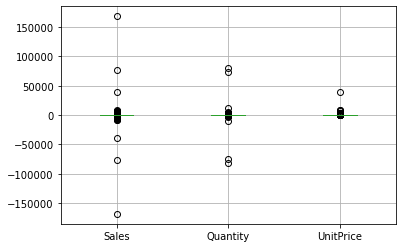

In [33]:
df.boxplot(column=['Sales', 'Quantity', 'UnitPrice'], return_type='axes')

<AxesSubplot:xlabel='Sales', ylabel='Density'>

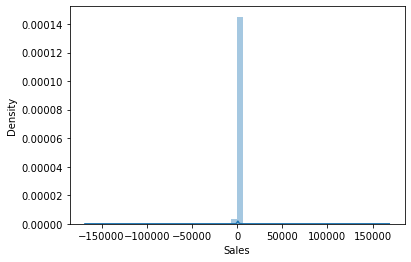

In [34]:
sns.distplot(df['Sales'])

<AxesSubplot:xlabel='UnitPrice', ylabel='Density'>

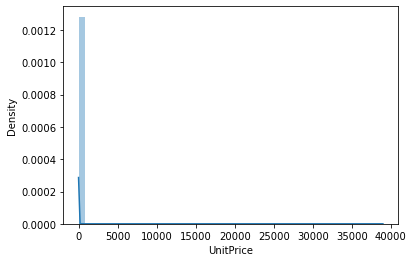

In [35]:
sns.distplot(df['UnitPrice'])

In [36]:
Q1 = df['Quantity'].quantile(0.32)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1

In [37]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_quality = df[(df['Quantity'] < lower_bound) | (df['Quantity'] > upper_bound)]
print(outliers_quality)

       InvoiceNo StockCode                       Description  Quantity  \
9         536367     84879     ASSORTED COLOUR BIRD ORNAMENT        32   
31        536370     10002       INFLATABLE POLITICAL GLOBE         48   
44        536370     22492           MINI PAINT SET VINTAGE         36   
46        536371     22086   PAPER CHAIN KIT 50'S CHRISTMAS         80   
65        536374     21258        VICTORIAN SEWING BOX LARGE        32   
...          ...       ...                               ...       ...   
541835    581579     23581            JUMBO BAG PAISLEY PARK        40   
541865    581583     20725           LUNCH BAG RED RETROSPOT        40   
541866    581583     85038   6 CHOCOLATE LOVE HEART T-LIGHTS        36   
541867    581584     20832  RED FLOCK LOVE HEART PHOTO FRAME        72   
541868    581584     85038   6 CHOCOLATE LOVE HEART T-LIGHTS        48   

               InvoiceDate  UnitPrice  CustomerID         Country   Sales  \
9      2010-12-01 08:34:00       1

In [38]:
df = df[(df['Quantity'] >= lower_bound) & (df['Quantity'] <= upper_bound)]

<AxesSubplot:xlabel='Quantity', ylabel='Density'>

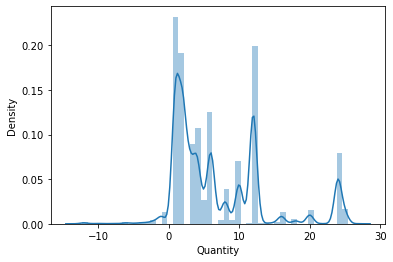

In [39]:
sns.distplot(df['Quantity'])

In [40]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_quality = df[(df['UnitPrice'] < lower_bound) | (df['UnitPrice'] > upper_bound)]
print(outliers_quality)

       InvoiceNo StockCode                         Description  Quantity  \
141      C536379         D                            Discount        -1   
246       536392     22827  RUSTIC  SEVENTEEN DRAWER SIDEBOARD         1   
294       536396     22803            IVORY EMBROIDERED QUILT          2   
431       536406     22803            IVORY EMBROIDERED QUILT          2   
1423      536540        C2                            CARRIAGE         1   
...          ...       ...                                 ...       ...   
533082   C581009         M                              Manual        -1   
535003    581179      POST                             POSTAGE         1   
535048    581182      POST                             POSTAGE         4   
536968    581232      POST                             POSTAGE         4   
541541   C581499         M                              Manual        -1   

               InvoiceDate  UnitPrice  CustomerID         Country   Sales  \
141    201

In [41]:
df = df[(df['Sales'] >= lower_bound) & (df['Sales'] <= upper_bound)]

<AxesSubplot:>

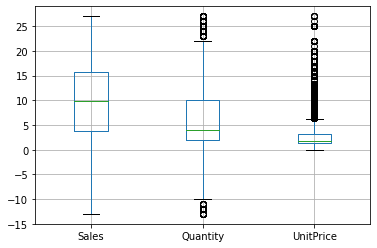

In [42]:
df.boxplot(column=['Sales', 'Quantity', 'UnitPrice'], return_type='axes')

<AxesSubplot:xlabel='Sales', ylabel='Density'>

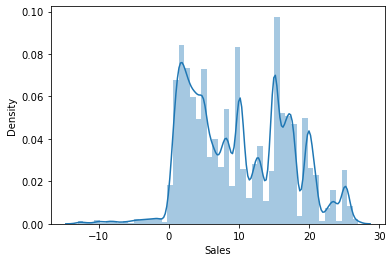

In [43]:
sns.distplot(df['Sales'])

<b>Adding Feature

In [44]:
def add_features(df):
    df['Sales']= df['Quantity']*df['UnitPrice']
    df['Day']=df['InvoiceDate'].dt.day
    df['Month']=df['InvoiceDate'].dt.month
    df['Year']=df['InvoiceDate'].dt.year
    return df

In [45]:
df=add_features(df)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Day,Month,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,1,12,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,1,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1,12,2010


In [46]:
Categorical_columns=[features for features in df.columns if df[features].dtypes=='O']
print('We have total', len(Categorical_columns), 'Categorical features and the features are\n \n', Categorical_columns,'\n \n')
Neumerical_columns=[features for features in df.columns if df[features].dtypes!='O']
print('We have total', len(Neumerical_columns), 'Neumerical features and the features are\n \n', Neumerical_columns)

We have total 4 Categorical features and the features are
 
 ['InvoiceNo', 'StockCode', 'Description', 'Country'] 
 

We have total 8 Neumerical features and the features are
 
 ['Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Sales', 'Day', 'Month', 'Year']


<b>EDA After Removing the outliers

In [47]:
Country_wise_sales=df.groupby('Country')['Sales'].sum().sort_values(ascending=False).rename('Total Sales').reset_index()
Country_wise_sales

,Country,Total Sales
0,United Kingdom,2902419.794
1,Germany,101667.010
2,France,92258.180
3,EIRE,77560.970
4,Spain,26650.790
5,Belgium,25843.940
6,Switzerland,18848.280
7,Portugal,14934.530
8,Norway,10137.900
9,Italy,9490.760


In [48]:
sales=df.groupby(['Month','Year'])['Sales'].sum().rename('Total sale of the month').reset_index()
sales

,Month,Year,Total sale of the month
0,1,2011,180808.910
1,2,2011,177212.400
2,3,2011,237092.090
3,4,2011,200080.681
4,5,2011,258787.530
5,6,2011,233468.540
6,7,2011,222699.901
7,8,2011,242079.300
8,9,2011,360669.382
9,10,2011,413294.160


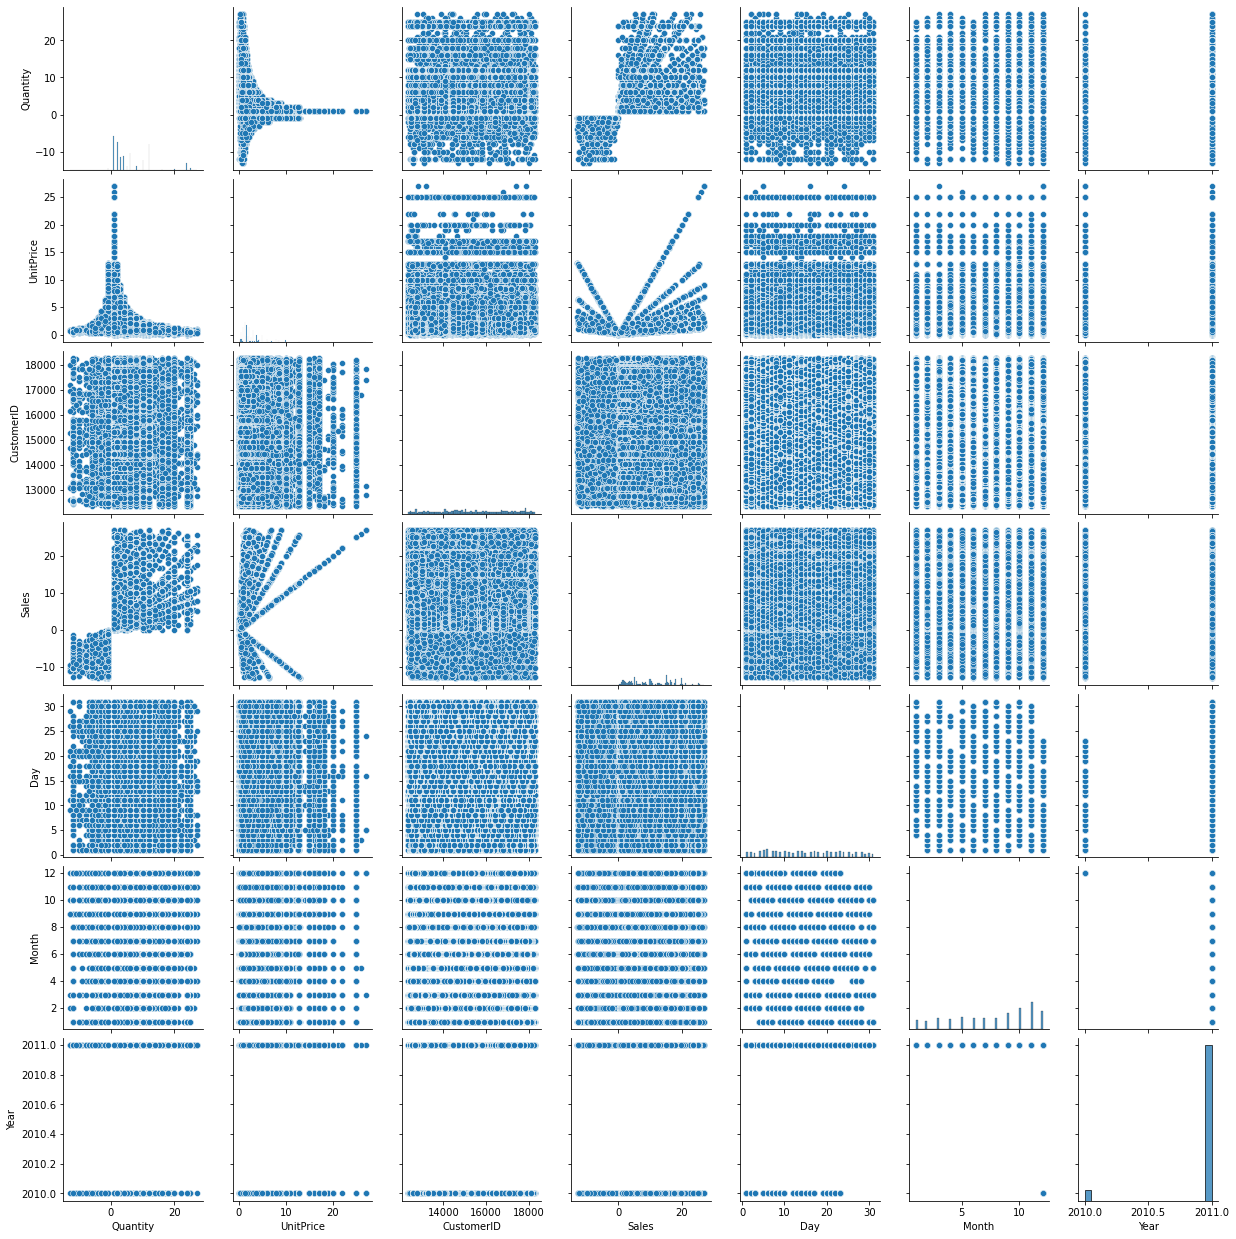

In [49]:
sns.pairplot(data=df)

<b>Total number of Countries

In [50]:
all_countries=df['Country'].unique()
all_countries

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Poland', 'Portugal', 'Italy',
       'Belgium', 'Lithuania', 'Japan', 'Iceland', 'Channel Islands',
       'Denmark', 'Spain', 'Cyprus', 'Finland', 'Austria', 'Sweden',
       'Greece', 'Singapore', 'Lebanon', 'United Arab Emirates', 'Israel',
       'Saudi Arabia', 'Czech Republic', 'Canada', 'Unspecified',
       'Brazil', 'USA', 'European Community', 'Bahrain', 'Malta', 'RSA'],
      dtype=object)

In [51]:
len(all_countries)

37

<b>Number of Didderent Customers and Quantity Ordered

In [52]:
df.groupby('CustomerID')['Quantity'].mean().sort_values(ascending=False).rename('Total Quantity Ordered').reset_index()

,CustomerID,Total Quantity Ordered
0,16569.0,25.000000
1,12497.0,24.000000
2,14423.0,24.000000
3,18058.0,24.000000
4,15744.0,24.000000
...,...,...
4179,16160.0,-4.500000
4180,12995.0,-5.000000
4181,16252.0,-7.166667
4182,18256.0,-11.500000


<b> Top Selling Countries

In [53]:
Country_wise_sales=df.groupby('Country')['Sales'].sum().sort_values(ascending=False).rename('Total Sales').reset_index()

In [54]:
Country_wise_sales

,Country,Total Sales
0,United Kingdom,2902419.794
1,Germany,101667.010
2,France,92258.180
3,EIRE,77560.970
4,Spain,26650.790
5,Belgium,25843.940
6,Switzerland,18848.280
7,Portugal,14934.530
8,Norway,10137.900
9,Italy,9490.760


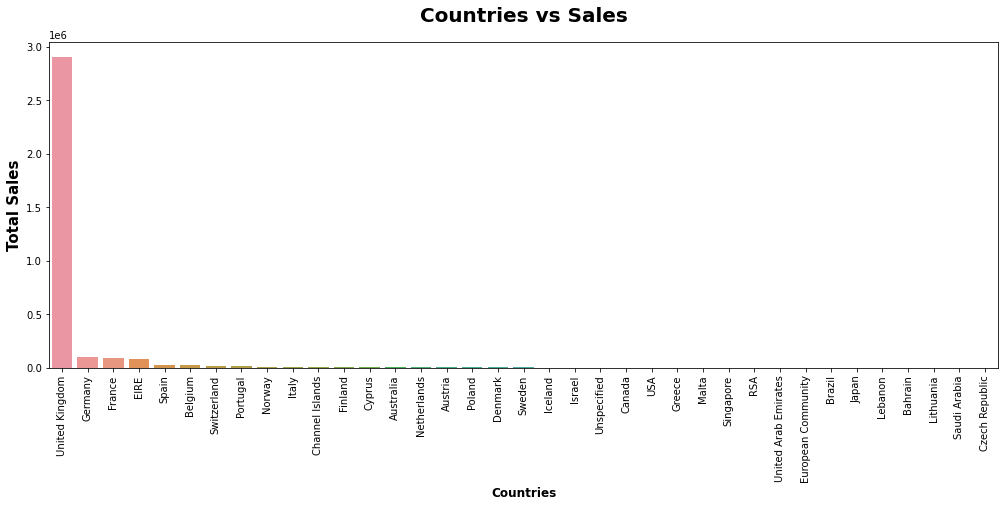

In [55]:
plt.subplots(figsize=(17,6))
sns.barplot(x='Country', data=Country_wise_sales,y="Total Sales")
plt.title("Countries vs Sales", weight="bold",fontsize=20, pad=20)
plt.ylabel("Total Sales", weight="bold", fontsize=15)
plt.xlabel('Countries', weight="bold", fontsize=12)
plt.xticks(rotation=90)
plt.show() 

<b> Top 10  Most Product Selling Countries

In [56]:
Top_10_countries=df.groupby('Country')['Sales'].sum().nlargest(10).rename('Total Sales').reset_index()
Top_10_countries

,Country,Total Sales
0,United Kingdom,2902419.794
1,Germany,101667.010
2,France,92258.180
3,EIRE,77560.970
4,Spain,26650.790
5,Belgium,25843.940
6,Switzerland,18848.280
7,Portugal,14934.530
8,Norway,10137.900
9,Italy,9490.760


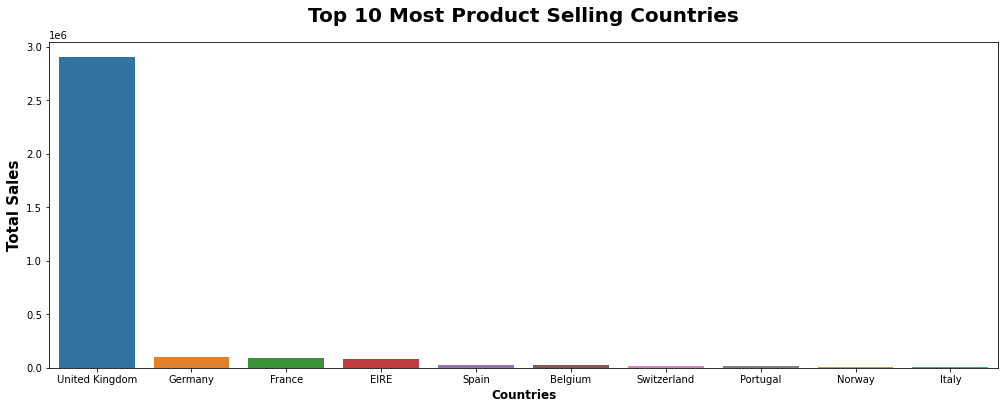

In [57]:
plt.subplots(figsize=(17,6))
sns.barplot(x='Country', data=Top_10_countries,y="Total Sales")
plt.title("Top 10 Most Product Selling Countries", weight="bold",fontsize=20, pad=20)
plt.ylabel("Total Sales", weight="bold", fontsize=15)
plt.xlabel('Countries', weight="bold", fontsize=12)
plt.show() 

In [58]:
df.groupby('Country')['Quantity'].sum().sort_values(ascending=False).rename('Total Quantity Sold').reset_index()

,Country,Total Quantity Sold
0,United Kingdom,1792447
1,Germany,68016
2,France,60575
3,EIRE,47010
4,Belgium,16188
5,Spain,16002
6,Switzerland,13506
7,Portugal,9428
8,Norway,6512
9,Channel Islands,5456


In [59]:
df.groupby('Country')['Quantity'].count().sort_values(ascending=False).rename('Number of Sales Occurred').reset_index()

,Country,Number of Sales Occurred
0,United Kingdom,302974
1,Germany,7272
2,France,6495
3,EIRE,5283
4,Spain,2098
5,Belgium,1720
6,Switzerland,1269
7,Portugal,1155
8,Norway,645
9,Italy,626


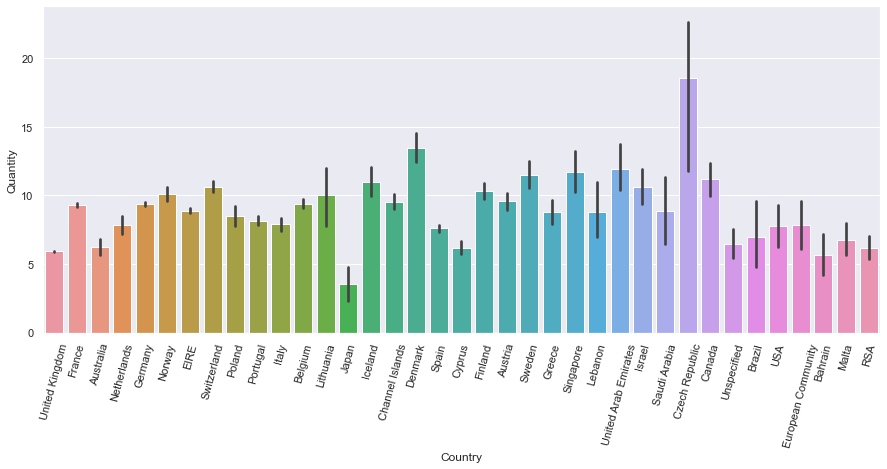

In [60]:
sns.set(rc={'figure.figsize':(15,6)})
cs=sns.barplot(x='Country',y='Quantity', data=df)
cs.tick_params(axis='x', rotation=75)

<AxesSubplot:>

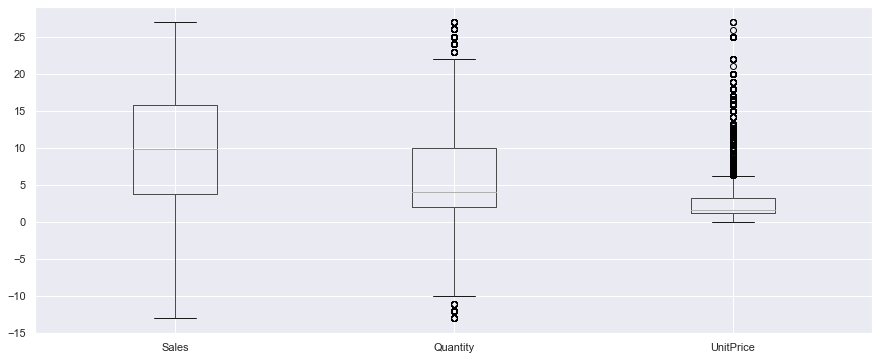

In [61]:
df.boxplot(column=['Sales', 'Quantity', 'UnitPrice'], return_type='axes')